In [5]:
#import libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#loading Dataset

In [6]:
#loading the data 
wine_df = pd.read_csv('C:\\Users\\hp\\Downloads\\winequality-red.csv')
#checking data distribution
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:

wine_df.shape

(1599, 12)

In [8]:
#getting info 
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


    PLOTTING GRAPHS FOR BETTER INSIGHT TO DATA DISTRIBUTION

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

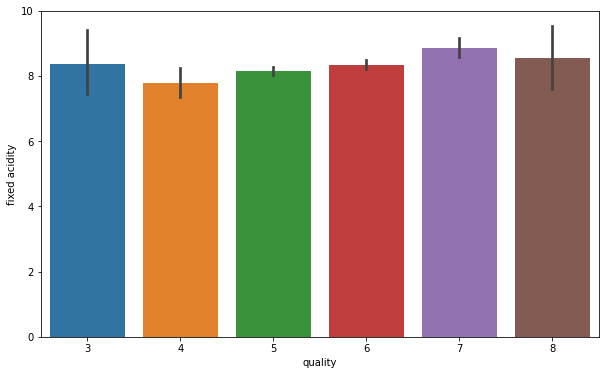

In [9]:
#FIXED ACIDITY V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='fixed acidity', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

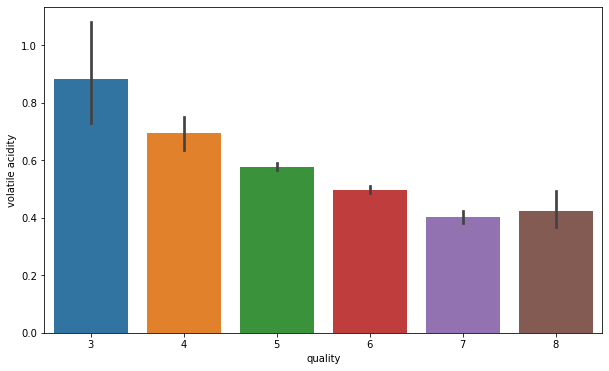

In [10]:
# volatile acidity V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='volatile acidity', data = wine_df)

#There is a 'downing trend' in the above plot

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

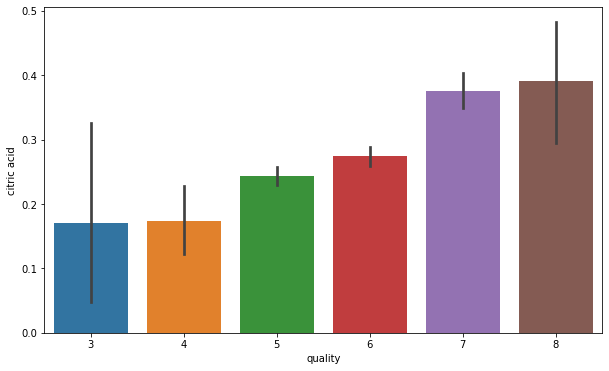

In [11]:
# citric V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='citric acid', data = wine_df)

There is a 'increasing trend 'in thh plt

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

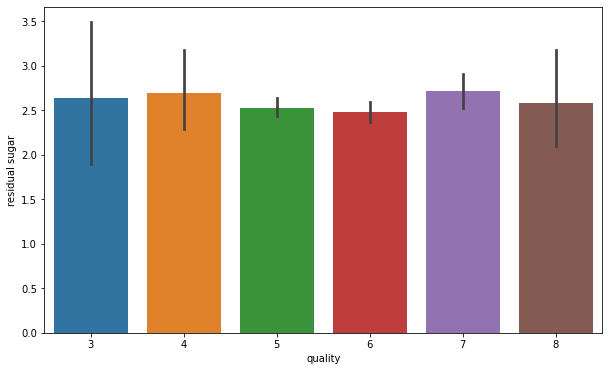

In [12]:
# Residual sugar V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='residual sugar', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

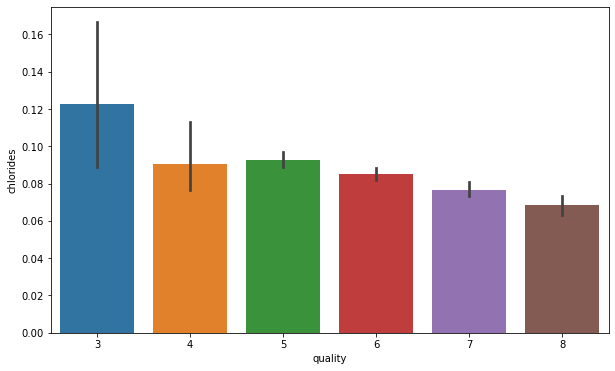

In [13]:
# chlorides V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='chlorides', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

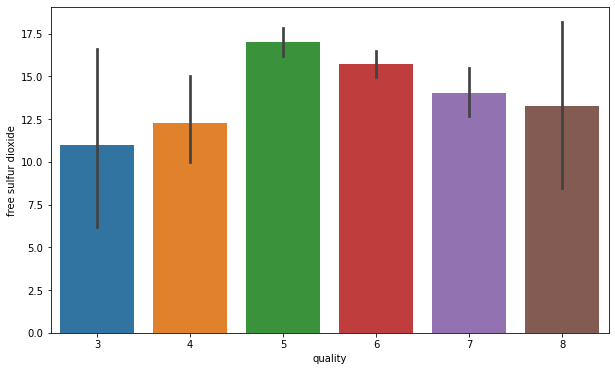

In [14]:
# free sulphur dioxide V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='free sulfur dioxide', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

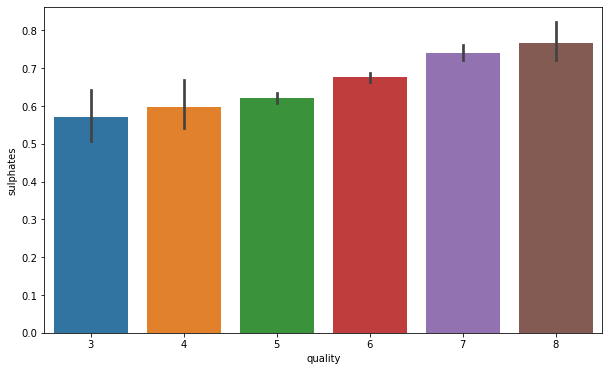

In [15]:
# sulphates V/S QUALITY
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='sulphates', data = wine_df)

#there is a increasing trend 

<AxesSubplot:xlabel='quality', ylabel='pH'>

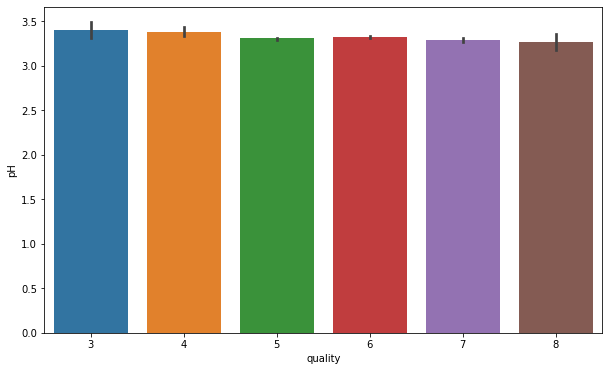

In [16]:
## ph V/S quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='pH', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

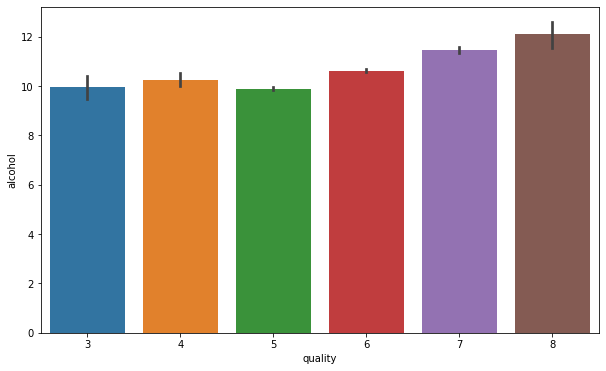

In [17]:
## alcohol V/S quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='alcohol', data = wine_df)

In [18]:
#Scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(wine_df)
normal_df = pd.DataFrame(normal_df, columns =wine_df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

#Pre-processing data for ML algorithms

In [19]:
#classifing the wine quality as good or bad based on its quality
# 'Bad' or 0 if quality of wine lies in range (3,6)
#Good or 1 if quality of range(7,8)

wine_df['good wine'] = ["yes" if i >= 7 else "no" for i in wine_df['quality']]
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,no
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no


In [20]:
X = normal_df.drop(["quality"], axis = 1)
y = wine_df["good wine"]

In [21]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


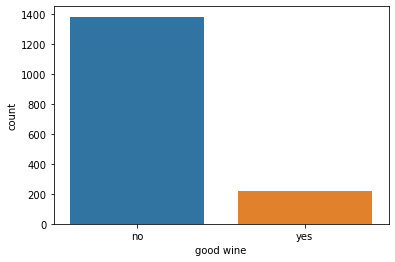

In [22]:
#visualize the counts
sns.countplot(y)
plt.show()

In [23]:
#Modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

In [24]:
#Baseline classifier
#Dummy classifier 
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


In [25]:
#Model One: Support Vector Classifier
#Let’s fit the training data to an SVM model.
from sklearn.svm import SVC
svc = SVC(random_state=2020)
svc.fit(X_train, y_train)

SVC(random_state=2020)

In [26]:
#SVM accuracy 
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8854166666666666


In [27]:
#0verfiting#Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=5)
print(scores.mean())

0.8642927115987462


In [28]:
#Accuracy score on training data
y_pred_train = svc.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8927613941018767


[[412   3]
 [ 52  13]]


<Figure size 720x432 with 0 Axes>

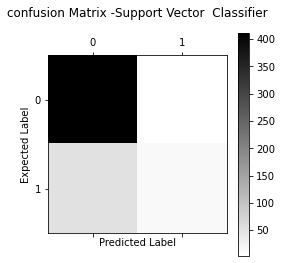

In [29]:
#Confusion matrix using the support vector classifier
cm =confusion_matrix(y_test,y_pred)
print(cm)

#Matplot for Confusion Matrix of support vector Classifier
fig = plt.figure(figsize =(10,6))
plt.matshow(cm , cmap = plt.cm.binary ,interpolation = 'nearest')
plt.title("confusion Matrix -Support Vector  Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [30]:
print("Total Predictions :" , len(y_pred))
print("Correct Prediction :", sum(y_pred == y_test))
print("Incorrect Prediction:" , sum(y_pred != y_test))
print("Accuracy:", sum(y_pred == y_test)*100/len(y_pred),"%")


Total Predictions : 480
Correct Prediction : 425
Incorrect Prediction: 55
Accuracy: 88.54166666666667 %


#Support Vector Classifier (Svc)


Tuning ML algorithm 

In [31]:
#SVC
#Finding  parameters for SVC models 
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc,random_grid,cv=5,random_state=2020)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 1}


In [33]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)

{'C': 1.3, 'kernel': 'rbf'}


In [34]:
svc_new = SVC(C = 1.3, kernel = "rbf", random_state = 2020)
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8854166666666666


In [35]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2020)

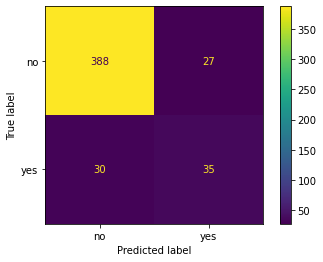

0.88125


In [36]:
from sklearn.metrics import plot_confusion_matrix
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred))

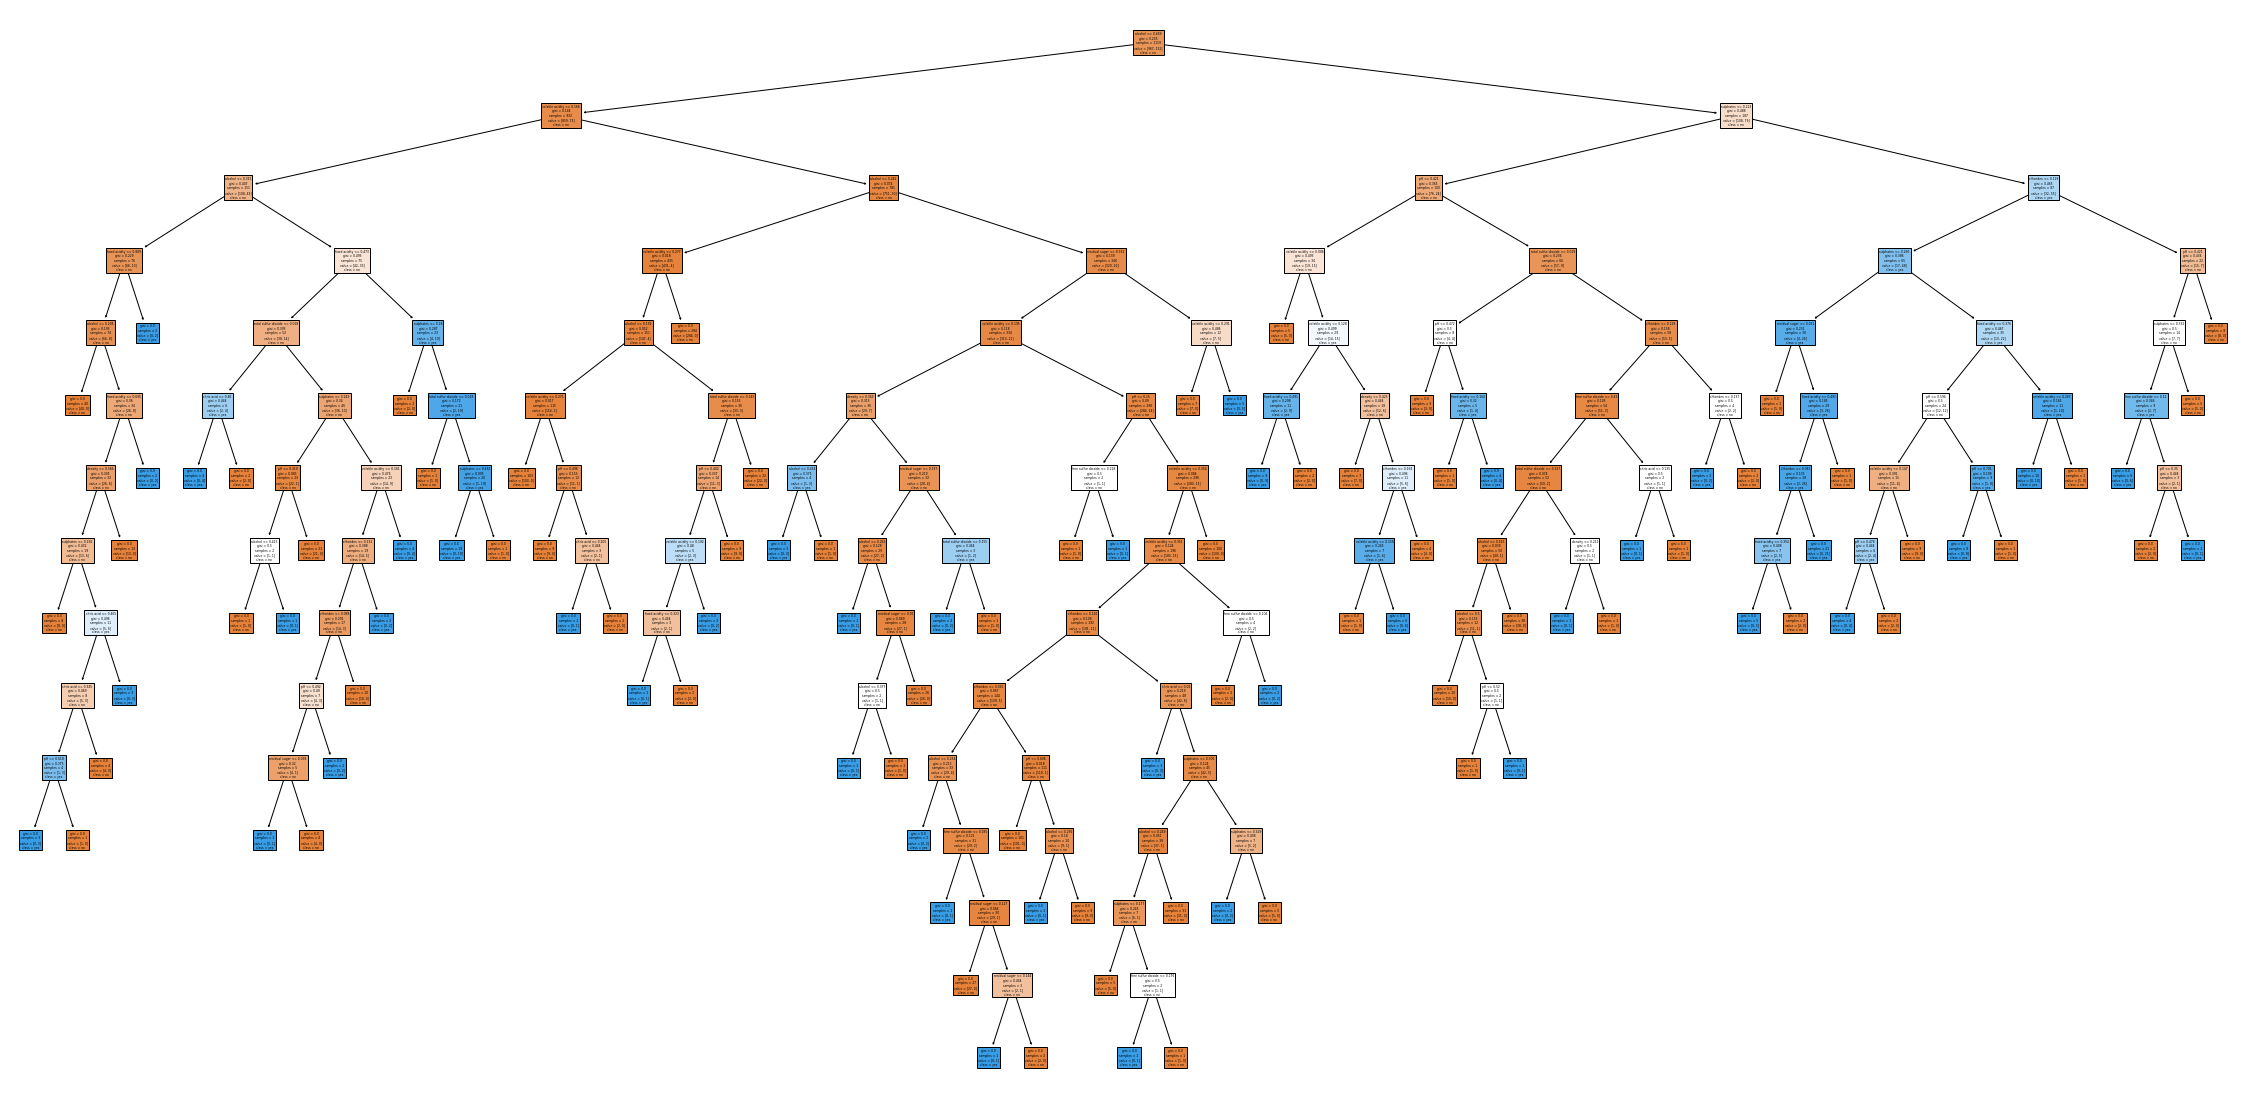

In [37]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [38]:
#Cross validation score 
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8054917711598746


In [39]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [40]:
#Tune the models parameter
param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 8}


In [41]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

0.8854166666666666
Cross Validation Score:  0.8786794670846394


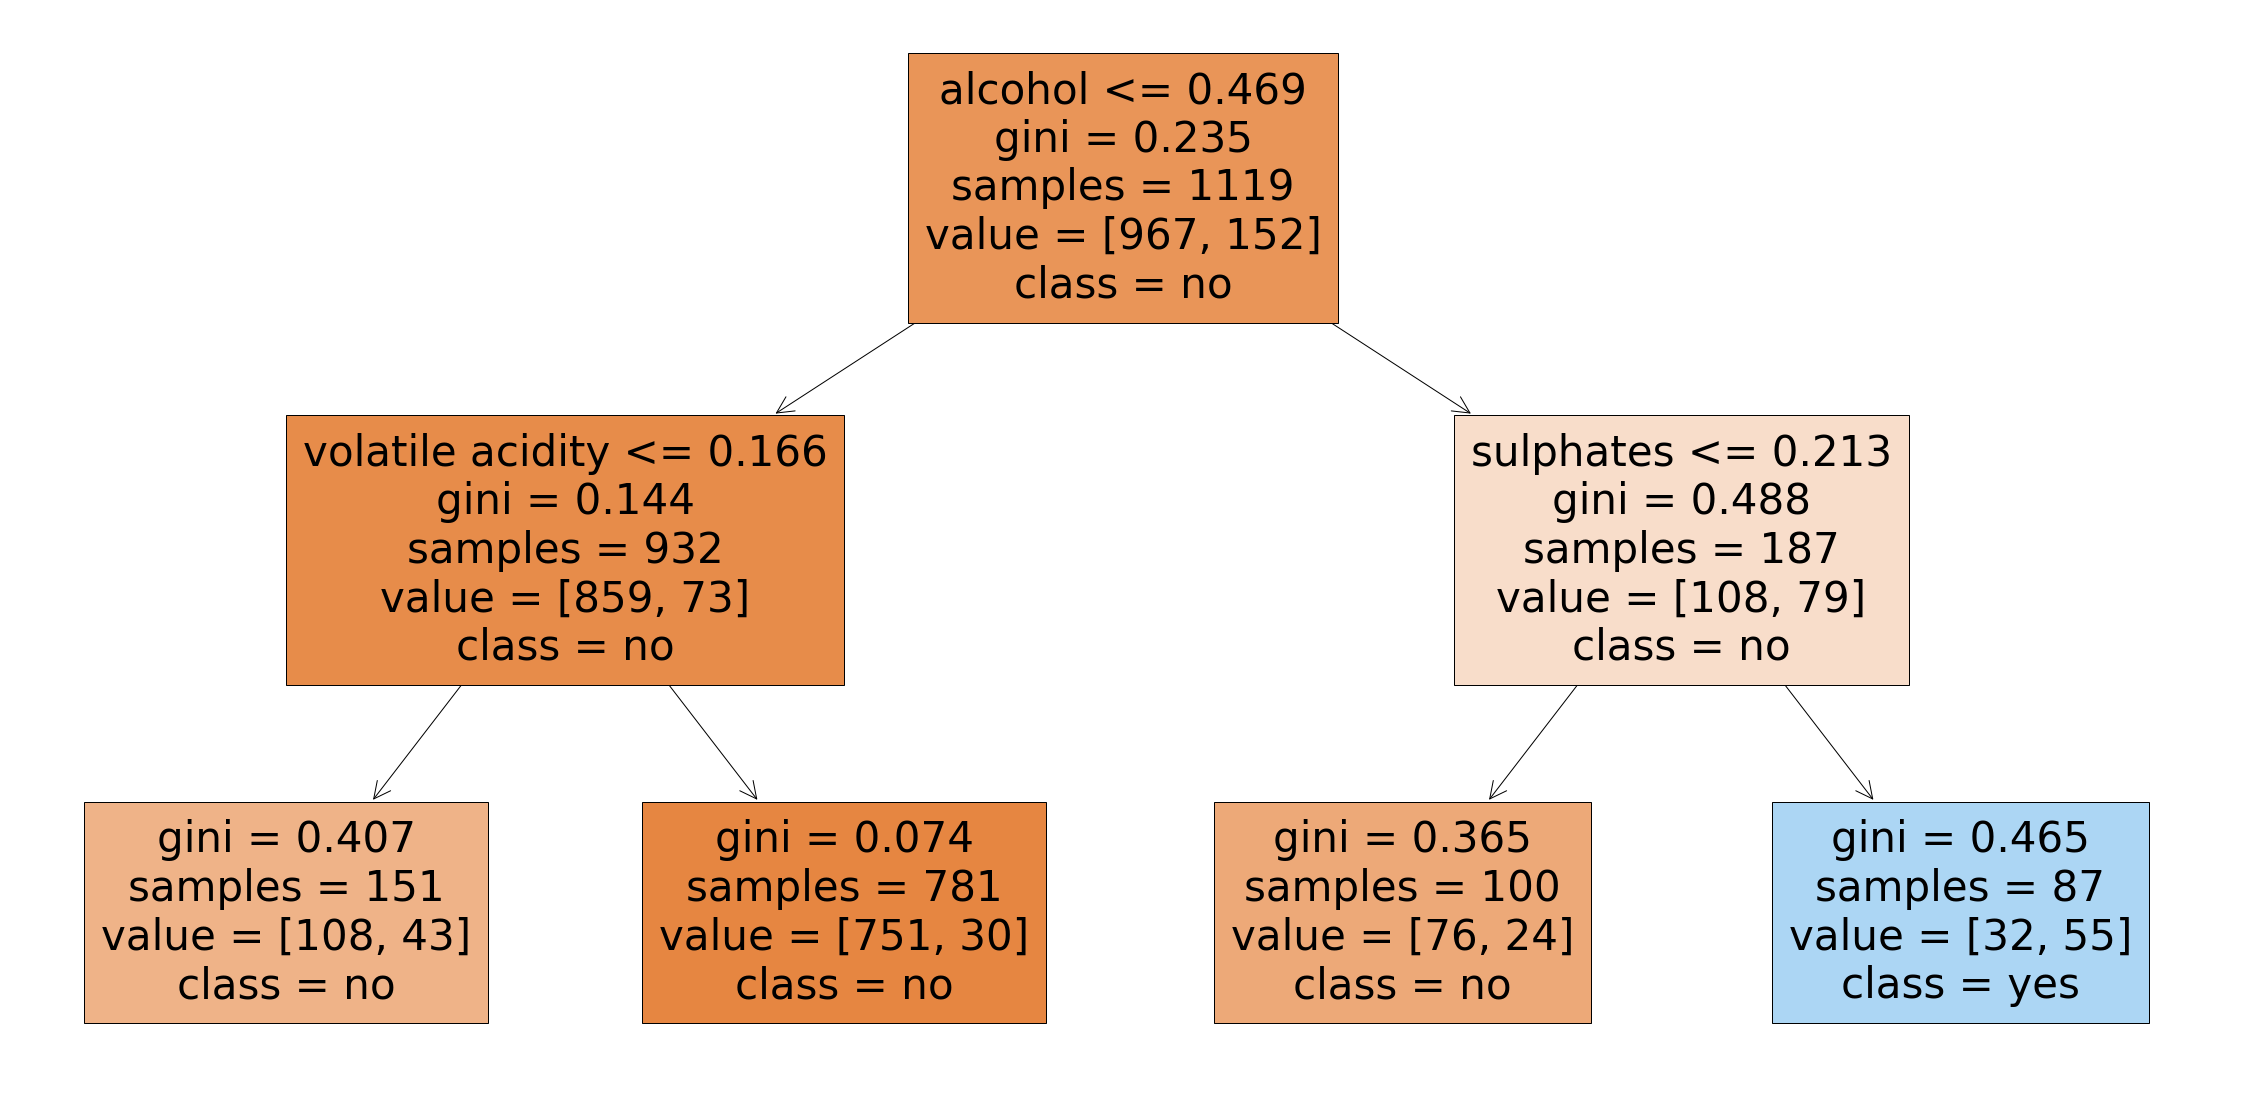

In [42]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [44]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [45]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8680466300940439


In [46]:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [56]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


In [57]:
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300, 'max_depth': 10}


In [58]:
param_dist = {"max_depth":[7,8,9,10,11,12,13,14,15],      "n_estimators":[280,300,320,350,380,400,420,450,480]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

{'max_depth': 14, 'n_estimators': 450}


In [59]:
rf_new = RandomForestClassifier(n_estimators = 450, max_depth =  14, random_state = 2020)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.9166666666666666
Cross Validation Score:  0.868669670846395


In [60]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.162224
volatile acidity,0.130491
sulphates,0.112694
density,0.096320
citric acid,0.093280


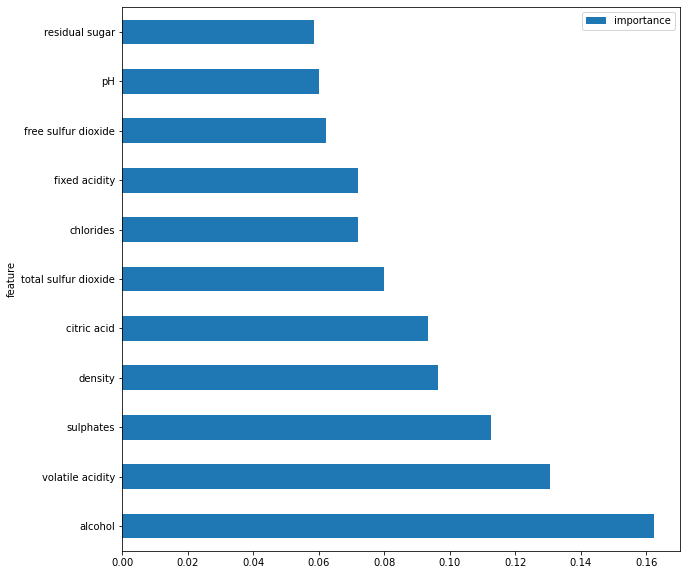

In [61]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()

In [63]:
#Conclusion
import numpy as np
print(np.average(wine_df[wine_df["good wine"] == "yes"].alcohol))
print(np.average(wine_df[wine_df["good wine"] == "no"].alcohol))

11.518049155145931
10.251037144235408


In [64]:
print(np.average(wine_df[wine_df["good wine"] == "yes"].sulphates))
print(np.average(wine_df[wine_df["good wine"] == "no"].sulphates))

0.7434562211981566
0.6447539797395079


In [65]:
wine_df_good = wine_df[wine_df["good wine"] == "yes"]
wine_df_bad = wine_df[wine_df["good wine"] == "no"]
print(np.average(wine_df_good["volatile acidity"]))
print(np.average(wine_df_bad["volatile acidity"]))

0.4055299539170507
0.5470224312590448
